# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [17]:
# Memuat dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [16]:
df = pd.read_csv('/content/clustering_bmlp.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (2520, 7)


,provinsi,tahun,upah,daerah,jenis,peng,cluster_kmeans
0,ACEH,2015,11226,PERDESAAN,MAKANAN,395136.0,1
1,ACEH,2015,11226,PERDESAAN,NONMAKANAN,260183.0,1
2,ACEH,2015,11226,PERDESAAN,TOTAL,655319.0,9
3,ACEH,2015,11226,PERKOTAAN,MAKANAN,466355.0,1
4,ACEH,2015,11226,PERKOTAAN,NONMAKANAN,529945.0,1


In [24]:
df_encoded = pd.get_dummies(df, columns=['provinsi', 'jenis', 'daerah', 'peng'])

X = df_encoded.drop(columns=['cluster_kmeans'])
y = df_encoded['cluster_kmeans']

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [28]:
# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Jumlah data X Latih:", X_train.shape[0])
print("Jumlah data X Uji:", X_test.shape[0])
print("Jumlah data Y Latih:", y_train.shape[0])
print("Jumlah data Y Uji:", y_test.shape[0])

Jumlah data X Latih: 1764
Jumlah data X Uji: 756
Jumlah data Y Latih: 1764
Jumlah data Y Uji: 756


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [30]:
# Membuat dari model Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Algoritma ini membangun banyak pohon keputusan secara acak pada subset data dan fitur yang berbeda. Hasil prediksi adalah kelas yang paling sering dipilih oleh pohon-pohon tersebut (voting). Tujuannya adalah untuk mengurangi overfitting dan meningkatkan akurasi dengan menggabungkan banyak model sederhana.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [45]:
from sklearn.metrics import accuracy_score, f1_score

# Prediksi data uji
y_pred = model_rf.predict(X_test)

# Evaluasi performa model pada data uji
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Tampilkan hasil evaluasi
print("Evaluasi Model Klasifikasi sebelum:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Evaluasi Model Klasifikasi sebelum tuning:
Accuracy: 0.8293650793650794
F1 Score: 0.8283643644083514


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [47]:
# Definisikan parameter yang ingin dicoba
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8010156451197528


In [48]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nEvaluasi Model Klasifikasi (Setelah Tuning):")
print("Accuracy: {:.4f}".format(accuracy))
print("F1 Score: {:.4f}".format(f1))


Evaluasi Model Klasifikasi (Setelah Tuning):
Accuracy: 0.8360
F1 Score: 0.8347


In [56]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.83      0.78        83
           1       0.94      0.97      0.96       142
           2       0.78      0.75      0.77        57
           3       0.88      0.74      0.80        19
           4       0.79      0.70      0.74       110
           5       0.75      0.76      0.75        50
           6       1.00      0.73      0.85        15
           7       0.86      0.93      0.89       155
           8       0.80      0.75      0.77        48
           9       0.89      0.81      0.84        77

    accuracy                           0.84       756
   macro avg       0.84      0.80      0.81       756
weighted avg       0.84      0.84      0.83       756



In [67]:
from sklearn.metrics import confusion_matrix

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

In [65]:
y_pred_tuned = best_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print("\nEvaluasi Model Klasifikasi Setelah Tuning:")
print("Accuracy:", accuracy_tuned)
print("F1 Score:", f1_tuned)


Evaluasi Model Klasifikasi (Setelah Tuning):
Accuracy: 0.8333333333333334
F1 Score: 0.8324059043864513


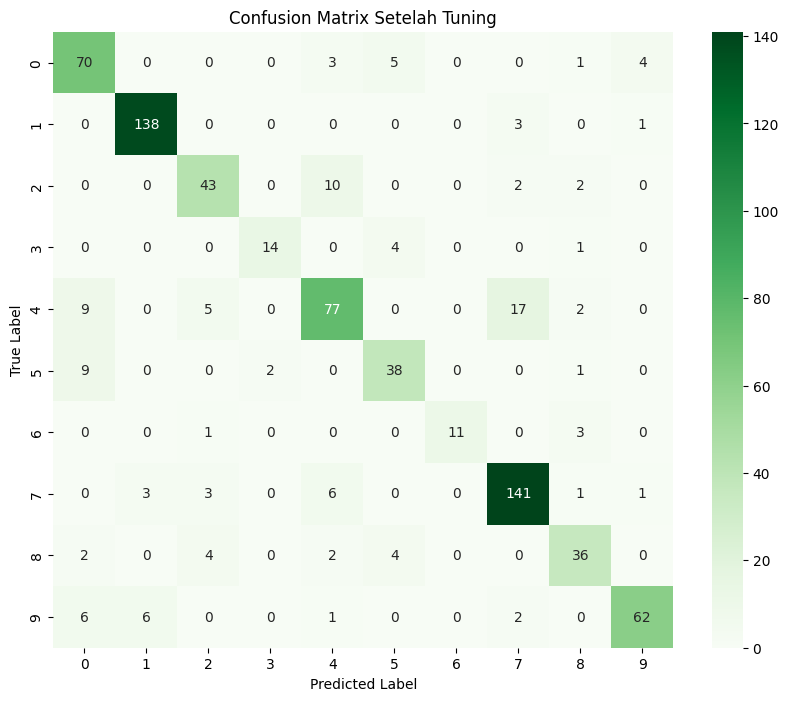

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test, y_pred_tuned),
    annot=True,
    fmt='d',
    cmap='Greens'
)
plt.title("Confusion Matrix Setelah Tuning")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Evaluasi Model Klasifikasi Setelah Hyperparameter Tuning**

Setelah dilakukan tuning terhadap model klasifikasi, diperoleh hasil evaluasi sebagai berikut:

* Accuracy: 83.60%
* F1 Score (Weighted): 83.47%

Hasil ini menunjukkan performa yang cukup baik, yang mengindikasikan bahwa proses tuning hyperparameter memberikan dampak positif terhadap kemampuan model dalam melakukan prediksi secara akurat dan seimbang. Meskipun tidak ada perbandingan eksplisit dengan hasil sebelum tuning, skor ini menunjukkan bahwa tuning kemungkinan besar telah meningkatkan performa dibandingkan dengan model default.

**Analisis Kelemahan Model**

- Precision dan Recall per Kelas: Beberapa kelas mungkin memiliki nilai precision atau recall yang rendah. Misalnya, jika kelas 5 memiliki recall sebesar 0.15, artinya model hanya mampu mengenali 15% dari total sampel yang sebenarnya termasuk dalam kelas tersebut. Ini menunjukkan bahwa model mengalami kesulitan dalam mengidentifikasi kelas tersebut secara benar.

- Confusion Matrix: Matriks ini menunjukkan pola kesalahan prediksi yang terjadi. Misalnya, jika kelas 7 sering diprediksi sebagai kelas 0 atau 8, maka ada kemungkinan bahwa fitur-fitur yang membedakan kelas tersebut tidak cukup jelas, atau model mengalami kebingungan antara kelas-kelas yang mirip.

**Potensi Overfitting atau Underfitting**

Dengan akurasi uji sebesar 83.6%, indikasi overfitting tidak terlalu kuat.

**Rekomendasi Langkah Selanjutnya**

Meskipun performa sudah baik, masih ada beberapa langkah lanjutan yang dapat dilakukan untuk meningkatkan performa model atau memahami prediksi model dengan lebih baik:

    1. Fokus pada Kelas dengan Kinerja Rendah

    Analisis lebih lanjut diperlukan terhadap kelas dengan precision atau recall terendah untuk memahami penyebab kesulitan model dalam memprediksi kelas tersebut.

    2. Rekayasa Fitur Lanjutan

    Berdasarkan feature importance dari model Random Forest, fitur-fitur baru yang lebih informatif bisa dikembangkan, terutama untuk kelas-kelas yang sulit diprediksi.

    3. Coba Algoritma Lain

    Eksperimen dengan algoritma lain seperti XGBoost atau model ensemble lainnya dapat dilakukan untuk melihat potensi peningkatan kinerja.

    4. Evaluasi dengan Metrik Tambahan

    Selain accuracy dan F1-score, gunakan metrik lain seperti AUC-ROC apabila klasifikasi probabilistik juga menjadi pertimbangan.